In [1]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import uproot

In [2]:
arr = np.array([[1,2,3,-2,-1], [6,7,8,-4,-3]])
print(arr[:, -2:])
print(arr[:, ::2])
print(arr[:, 1:-2])
print(arr[:, 0:5])


[[-2 -1]
 [-4 -3]]
[[ 1  3 -1]
 [ 6  8 -3]]
[[2 3]
 [7 8]]
[[ 1  2  3 -2 -1]
 [ 6  7  8 -4 -3]]


In [3]:
print(arr)
print(np.expand_dims(arr, axis=1))

[[ 1  2  3 -2 -1]
 [ 6  7  8 -4 -3]]
[[[ 1  2  3 -2 -1]]

 [[ 6  7  8 -4 -3]]]


keys dict_keys(['a_arr', 'b_arr'])
values dict_values([array([-0.8519482 ,  0.2126255 , -0.89265491, ...,  3.49551319,
        0.95128577, -0.77507911]), array([ 2.38465541, -0.71507148,  0.35684691, ..., -2.79143794,
        2.37766085, -0.31945256])])
items dict_items([('a_arr', array([-0.8519482 ,  0.2126255 , -0.89265491, ...,  3.49551319,
        0.95128577, -0.77507911])), ('b_arr', array([ 2.38465541, -0.71507148,  0.35684691, ..., -2.79143794,
        2.37766085, -0.31945256]))])
updated dict {'a_arr': array([-0.8519482 ,  0.2126255 , -0.89265491, ...,  3.49551319,
        0.95128577, -0.77507911]), 'b_arr': array([ 2.38465541, -0.71507148,  0.35684691, ..., -2.79143794,
        2.37766085, -0.31945256]), 'c_arr': array([-1.05403991, -1.25124108, -1.27623866, ..., -1.42717559,
       -0.34134372, -0.57253267])}


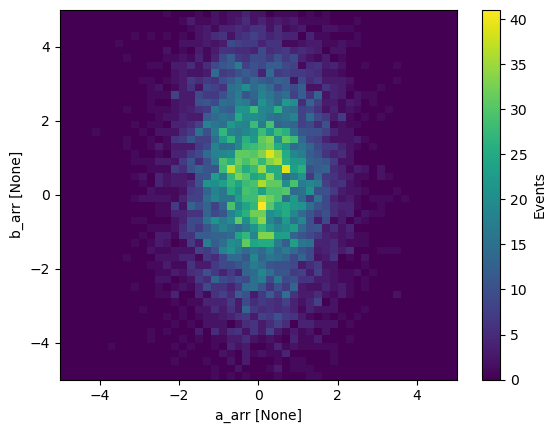

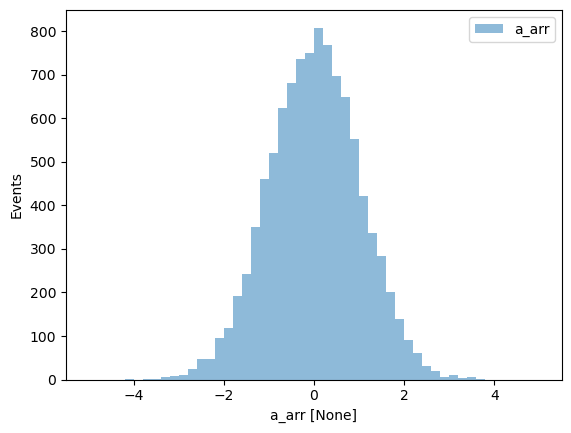

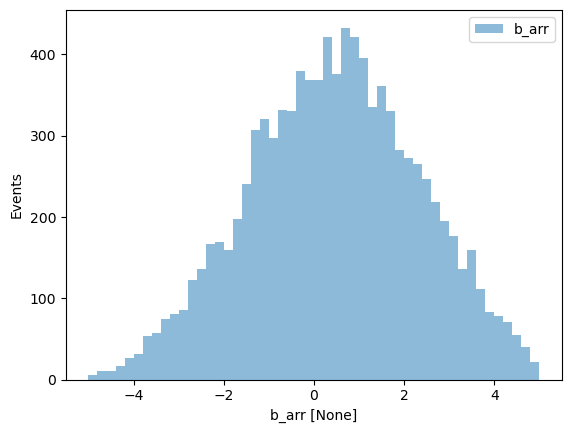

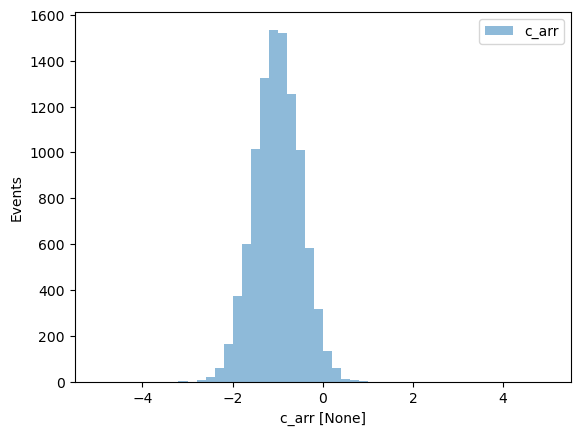

In [4]:
rng = np.random.default_rng(114)

a_arr = rng.normal(0, 1, 10_000)
b_arr = rng.normal(0.5, 2, 10_000)

bins_edges = np.linspace(-5, 5, 51)
data_dict = {"a_arr": a_arr, "b_arr": b_arr}
data_dict2 = {"data": [a_arr, b_arr], "name": ["a_arr", "b_arr"]}
print("keys", data_dict.keys())
print("values", data_dict.values())
print("items", data_dict.items())
data_dict.update({"c_arr": rng.normal(-1, 0.5, 10_000)})
print("updated dict", data_dict)

plt.hist2d(data_dict["a_arr"], data_dict["b_arr"], bins=bins_edges)
plt.xlabel("a_arr [None]")
plt.ylabel("b_arr [None]")
plt.colorbar(label="Events")
plt.show()

for name, data in data_dict.items():
	plt.hist(data, bins=bins_edges, alpha=0.5, label=name)
	plt.xlabel(f"{name} [None]")
	plt.ylabel("Events")
	plt.legend()
	plt.show()

In [5]:

tree_path = glob.glob("./user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYSLITE.e5769_s3681_r13167_p6697.170425-v4_output/user.stkorn.44185997._000001.output.root")

# `with <expression> as <var>` has __enter__ and __exit__ methods
# ! remember to close your file; otherwise, the resources will be too consuming
with uproot.open(tree_path[0], mode="r") as file:
    print(file.classnames()) # ;1 is a cycle number (it"s a convention like first version in ROOT) don"t care about it :)
    tree = file["truth;1"]
    print(tree.keys()) # T: Table like; H: Histogram; 1: 1-dimensional; D: double, it"s precision
    # print(tree.num_entries) # show how many leaves are in the branch of the tree
    # print(tree.show()) # show branches

IndexError: list index out of range

In [ ]:
# only process the branches you"d like to keep
branches = [
	"HWW_MC_Hdecay1_decay1_afterFSR_pt",
    "HWW_MC_Hdecay1_decay1_afterFSR_eta",
    "HWW_MC_Hdecay1_decay1_afterFSR_phi",
    "HWW_MC_Hdecay1_decay1_afterFSR_pdgId",
    "HWW_MC_Hdecay1_decay2_afterFSR_pt",
    "HWW_MC_Hdecay1_decay2_afterFSR_eta",
    "HWW_MC_Hdecay1_decay2_afterFSR_phi",
    "HWW_MC_Hdecay1_decay2_afterFSR_pdgId",
    "HWW_MC_Hdecay2_decay1_afterFSR_pt",
    "HWW_MC_Hdecay2_decay1_afterFSR_eta",
    "HWW_MC_Hdecay2_decay1_afterFSR_phi",
    "HWW_MC_Hdecay2_decay1_afterFSR_pdgId",
    "HWW_MC_Hdecay2_decay2_afterFSR_pt",
    "HWW_MC_Hdecay2_decay2_afterFSR_eta",
    "HWW_MC_Hdecay2_decay2_afterFSR_phi",
    "HWW_MC_Hdecay2_decay2_afterFSR_pdgId",
    "HWW_MC_Hdecay1_afterFSR_pt",
    "HWW_MC_Hdecay1_afterFSR_eta",
    "HWW_MC_Hdecay1_afterFSR_phi",
    "HWW_MC_Hdecay1_afterFSR_m",
    "HWW_MC_Hdecay1_afterFSR_pdgId",
    "HWW_MC_Hdecay2_afterFSR_pt",
    "HWW_MC_Hdecay2_afterFSR_eta",
    "HWW_MC_Hdecay2_afterFSR_phi",
    "HWW_MC_Hdecay2_afterFSR_m",
    "HWW_MC_Hdecay2_afterFSR_pdgId",
    "HWW_MC_H_afterFSR_pt",
    "HWW_MC_H_afterFSR_eta",
    "HWW_MC_H_afterFSR_phi",
    "HWW_MC_H_afterFSR_m",
    "HWW_MC_H_afterFSR_pdgId",
]
tree_np = tree.arrays(branches, library="np") # or library="pd" for pandas dataframe

In [ ]:
# the considered process is H -> W1W2 -> l1v1l2v2 after Final-State-Radiation
# retrieve leaves on the specific branches

h_pt = tree_np["HWW_MC_H_afterFSR_pt"]
h_eta = tree_np["HWW_MC_H_afterFSR_eta"]
h_phi = tree_np["HWW_MC_H_afterFSR_phi"]
h_m = tree_np["HWW_MC_H_afterFSR_m"]
h_id = tree_np["HWW_MC_H_afterFSR_pdgId"]

parent1_pt = tree_np["HWW_MC_Hdecay1_afterFSR_pt"]
parent1_eta = tree_np["HWW_MC_Hdecay1_afterFSR_eta"]
parent1_phi = tree_np["HWW_MC_Hdecay1_afterFSR_phi"]
parent1_m = tree_np["HWW_MC_Hdecay1_afterFSR_m"]
parent1_id = tree_np["HWW_MC_Hdecay1_afterFSR_pdgId"]
child11_pt = tree_np["HWW_MC_Hdecay1_decay1_afterFSR_pt"]
child11_eta = tree_np["HWW_MC_Hdecay1_decay1_afterFSR_eta"]
child11_phi = tree_np["HWW_MC_Hdecay1_decay1_afterFSR_phi"]
child11_pdgId = tree_np["HWW_MC_Hdecay1_decay1_afterFSR_pdgId"]
child12_pt = tree_np["HWW_MC_Hdecay1_decay2_afterFSR_pt"]
child12_eta = tree_np["HWW_MC_Hdecay1_decay2_afterFSR_eta"]
child12_phi = tree_np["HWW_MC_Hdecay1_decay2_afterFSR_phi"]
child12_pdgId = tree_np["HWW_MC_Hdecay1_decay2_afterFSR_pdgId"]

parent2_pt = tree_np["HWW_MC_Hdecay2_afterFSR_pt"]
parent2_eta = tree_np["HWW_MC_Hdecay2_afterFSR_eta"]
parent2_phi = tree_np["HWW_MC_Hdecay2_afterFSR_phi"]
parent2_m = tree_np["HWW_MC_Hdecay2_afterFSR_m"]
parent2_id = tree_np["HWW_MC_Hdecay2_afterFSR_pdgId"]
child21_pt = tree_np["HWW_MC_Hdecay2_decay1_afterFSR_pt"]
child21_eta = tree_np["HWW_MC_Hdecay2_decay1_afterFSR_eta"]
child21_phi = tree_np["HWW_MC_Hdecay2_decay1_afterFSR_phi"]
child21_pdgId = tree_np["HWW_MC_Hdecay2_decay1_afterFSR_pdgId"]
child22_pt = tree_np["HWW_MC_Hdecay2_decay2_afterFSR_pt"]
child22_eta = tree_np["HWW_MC_Hdecay2_decay2_afterFSR_eta"]
child22_phi = tree_np["HWW_MC_Hdecay2_decay2_afterFSR_phi"]
child22_pdgId = tree_np["HWW_MC_Hdecay2_decay2_afterFSR_pdgId"]

# cleanup resources
del tree_np

In [ ]:
# all the branches are with the same number of leaves!
print(parent2_pt.shape)
print(parent1_eta.shape)

(1997000,)
(1997000,)


In [ ]:
#  we will treat lepton masses as constants compared to the (W±,Z0) bosons

mass_of_el = 0.5 # MeV
mass_of_mu = 105.7 # MeV
mass_of_tau = 1776.9 # MeV

print(np.unique(child11_pdgId))
child11_m = np.select(
    [np.abs(child11_pdgId) == 11, np.abs(child11_pdgId) == 13, np.abs(child11_pdgId) == 15],
    [mass_of_el, mass_of_mu, mass_of_tau],
    default=0.0 # neutrinos are massless
)
print(np.unique(child12_pdgId))
child12_m = np.select(
    [np.abs(child12_pdgId) == 11, np.abs(child12_pdgId) == 13, np.abs(child12_pdgId) == 15],
    [mass_of_el, mass_of_mu, mass_of_tau],
    default=0.0
)
print(np.unique(child21_pdgId))
child21_m = np.select(
    [np.abs(child21_pdgId) == 11, np.abs(child21_pdgId) == 13, np.abs(child21_pdgId) == 15],
    [mass_of_el, mass_of_mu, mass_of_tau],
    default=0.0
)
print(np.unique(child22_pdgId))
child22_m = np.select(
    [np.abs(child22_pdgId) == 11, np.abs(child22_pdgId) == 13, np.abs(child22_pdgId) == 15],
    [mass_of_el, mass_of_mu, mass_of_tau],
    default=0.0
)
print(np.unique(child11_m))

[-15 -13 -11   0]
[ 0 12 14 16]
[ 0 11 13 15]
[-16 -14 -12   0]
[0.0000e+00 5.0000e-01 1.0570e+02 1.7769e+03]


In [ ]:
a = np.array([True, True, False]) 
b = np.array([True, False, False]) 
print(a == b) # check values of two objects
print(a & b)  # element-wise AND 
print(a is b) # check if they are the same object
c = a 
d = a.copy()
print(a is c) # check if they are the same object
print(a is d) # check if they are the same object

[ True False  True]
[ True False False]
False
True
False


In [ ]:
#  how to remove outliers (or non-triggered evts)

trigger_mask = child22_pdgId != 0
trigger_mask2 = child21_pdgId != 0
print(len(trigger_mask))
print((trigger_mask == trigger_mask2).all())
print((trigger_mask & trigger_mask2).sum())

1997000
True
1996481


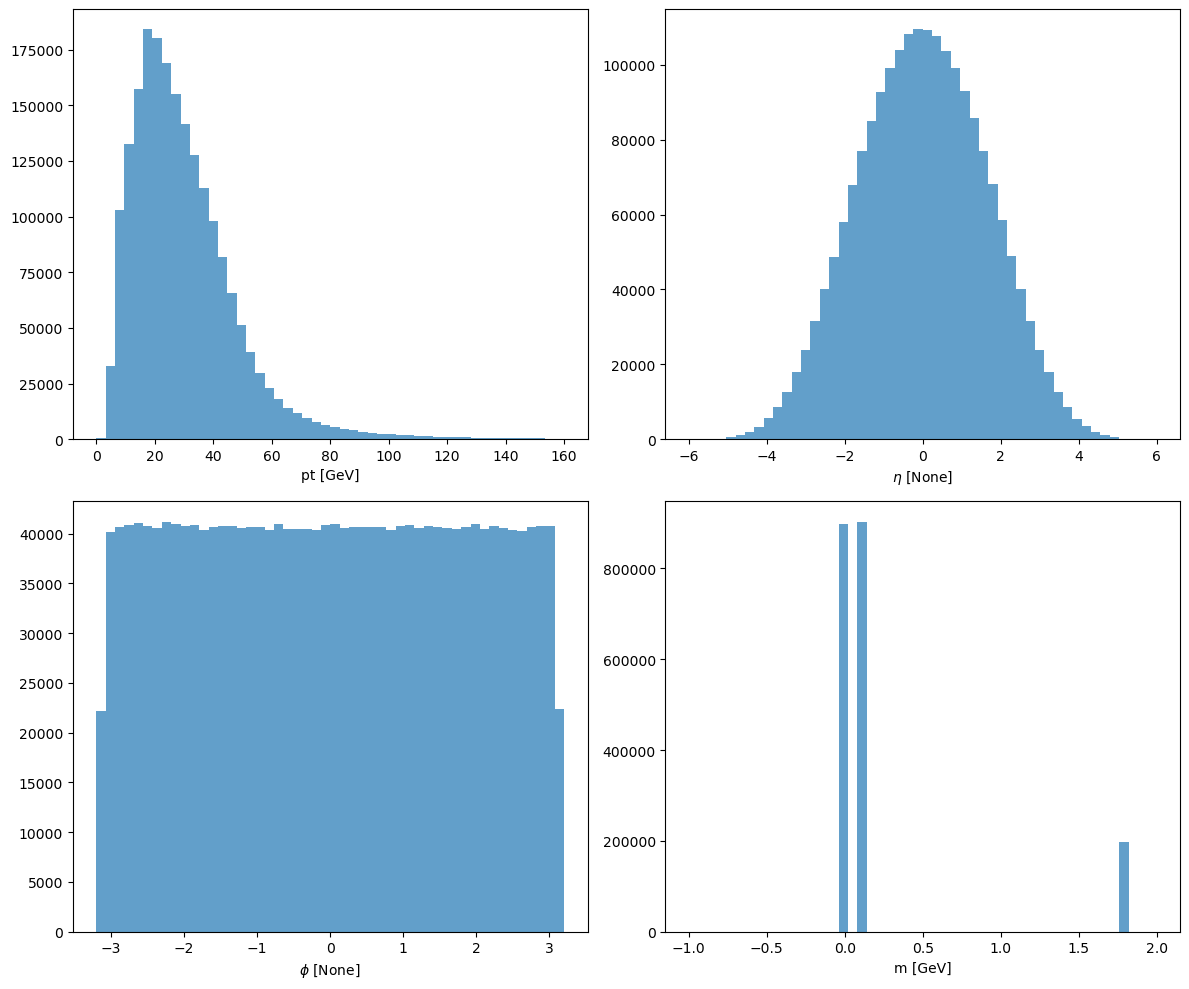

In [ ]:
# TODO: plot 1d histograms of l1 (pt, eta, phi, m) in 1 figure

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].hist(child11_pt[trigger_mask] * 1e-3, bins=np.linspace(0, 160, 51), alpha=0.7, label="l1 pt")
axs[0, 0].set_xlabel("pt [GeV]")
axs[0, 1].hist(child11_eta[trigger_mask], bins=np.linspace(-6, 6, 51), alpha=0.7, label="l1 eta")
axs[0, 1].set_xlabel("$\eta$ [None]")
axs[1, 0].hist(child11_phi[trigger_mask], bins=np.linspace(-3.2, 3.2, 51), alpha=0.7, label="l1 phi")
axs[1, 0].set_xlabel("$\phi$ [None]")
axs[1, 1].hist(child11_m[trigger_mask] * 1e-3, bins=np.linspace(-1, 2, 51), alpha=0.7, label="l1 m")
axs[1, 1].set_xlabel("m [GeV]")
plt.tight_layout()
plt.show()

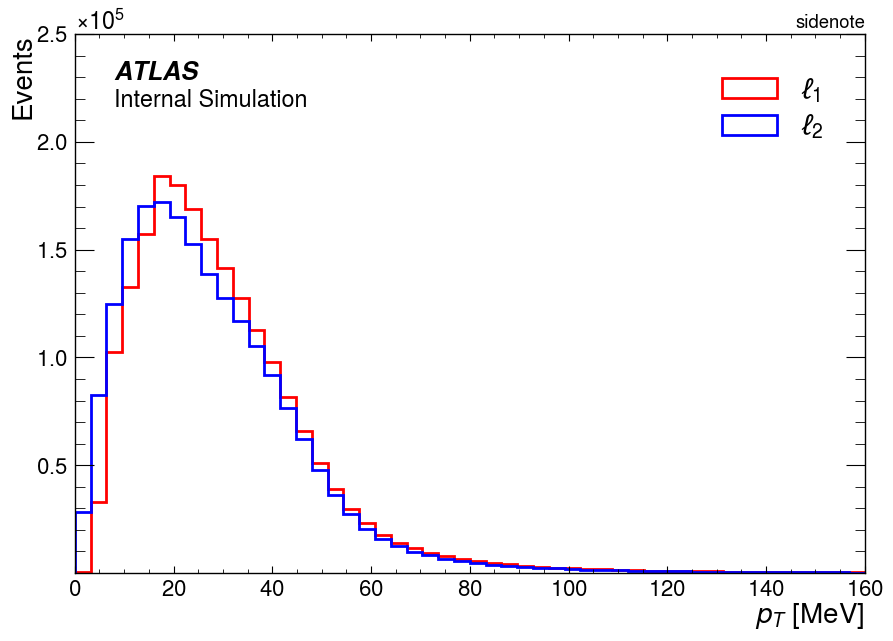

In [ ]:
import mplhep as hep 
hep.style.use("ATLAS")

fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(0, 160, 51) # important to fix bins_edges
hep.atlas.label(loc=2, data=True, label="Internal Simulation", rlabel="sidenote") # atlas label (optional)
# important to choose the proper unit for x-axis
plt.hist(child11_pt[trigger_mask] * 1e-3, bins=bins_edges, histtype="step", linewidth=2, color="red", label=r"$\ell_1$")
plt.hist(child12_pt[trigger_mask] * 1e-3, bins=bins_edges, histtype="step", linewidth=2, color="blue", label=r"$\ell_2$")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$p_T$ [MeV]", fontsize=20, labelpad=0) # remember to include unit
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
# plt.yscale("log")
plt.ylim(1, 2.5e5)
plt.savefig("lepton_pt.pdf", bbox_inches="tight") # save in vector format (e.g., pdf), trim out extra white space
plt.show()

In [ ]:
# the considered process is H -> W1W2 -> l1v1l2v2 after Final-State-Radiation
# retrieve leaves on the specific branches

higgs_pt = h_pt[trigger_mask]
higgs_eta = h_eta[trigger_mask]
higgs_phi = h_phi[trigger_mask]
higgs_m = h_m[trigger_mask]
higgs_pdgId = h_id[trigger_mask]

# parent1 is W+
w_pos_pt = parent1_pt[trigger_mask]
w_pos_eta = parent1_eta[trigger_mask]
w_pos_phi = parent1_phi[trigger_mask]
w_pos_m = parent1_m[trigger_mask]
w_pos_pdgId = parent1_id[trigger_mask]
lep_pos_pt = child11_pt[trigger_mask]
lep_pos_eta = child11_eta[trigger_mask]
lep_pos_phi = child11_phi[trigger_mask]
lep_pos_pdgId = child11_pdgId[trigger_mask]
nu_pt = child12_pt[trigger_mask]
nu_eta = child12_eta[trigger_mask]
nu_phi = child12_phi[trigger_mask]
nu_pdgId = child12_pdgId[trigger_mask]

# parent2 is W-
w_neg_pt = parent2_pt[trigger_mask]
w_neg_eta = parent2_eta[trigger_mask]
w_neg_phi = parent2_phi[trigger_mask]
w_neg_m = parent2_m[trigger_mask]
w_neg_pdgId = parent2_id[trigger_mask]
lep_neg_pt = child21_pt[trigger_mask]
lep_neg_eta = child21_eta[trigger_mask]
lep_neg_phi = child21_phi[trigger_mask]
lep_neg_pdgId = child21_pdgId[trigger_mask]
anti_nu_pt = child22_pt[trigger_mask]
anti_nu_eta = child22_eta[trigger_mask]
anti_nu_phi = child22_phi[trigger_mask]
anti_nu_pdgId = child22_pdgId[trigger_mask]

In [ ]:
branches = {
    "higgs_pt": higgs_pt,
    "higgs_eta": higgs_eta,
    "higgs_phi": higgs_phi,
    "higgs_m": higgs_m,
    "higgs_pdgId": higgs_pdgId,
    "w_pos_pt": w_pos_pt,
    "w_pos_eta": w_pos_eta,
    "w_pos_phi": w_pos_phi,
    "w_pos_m": w_pos_m,
    "w_pos_pdgId": w_pos_pdgId,
    "lep_pos_pt": lep_pos_pt,
    "lep_pos_eta": lep_pos_eta,
    "lep_pos_phi": lep_pos_phi,
    "lep_pos_pdgId": lep_pos_pdgId,
    "nu_pt": nu_pt,
    "nu_eta": nu_eta,
    "nu_phi": nu_phi,
    "nu_pdgId": nu_pdgId,
    "w_neg_pt": w_neg_pt,
    "w_neg_eta": w_neg_eta,
    "w_neg_phi": w_neg_phi,
    "w_neg_m": w_neg_m,
    "w_neg_pdgId": w_neg_pdgId,
    "lep_neg_pt": lep_neg_pt,
    "lep_neg_eta": lep_neg_eta,
    "lep_neg_phi": lep_neg_phi,
    "lep_neg_pdgId": lep_neg_pdgId,
    "anti_nu_pt": anti_nu_pt,
    "anti_nu_eta": anti_nu_eta,
    "anti_nu_phi": anti_nu_phi,
    "anti_nu_pdgId": anti_nu_pdgId
}

branch_types = {k: str(v.dtype) for k, v in branches.items()}

with uproot.recreate("QE_MC20_v4_r13167_HWWlvlv.root") as f:
    tree = f.mktree("truth", branch_types)
    tree.extend(branches)

In [ ]:
"""
`with <expression> as <var>` has __enter__ and __exit__ methods
(!) remember to close your file; otherwise, the resources will be too consuming
"""
with uproot.open("QE_MC20_v4_r13167_HWWlvlv.root") as f:
    
    print(f.classnames()) # {"truth;1": "TTree"}
    # ;1 is a cycle number (it"s a convention like first version in ROOT) don"t care about it :)
    
    branches = f["truth;1"]              # select the tree and store its branches
    print(branches)                      # <TTree "truth" (31 branches) at MEMORY_ADDRESS>
    print(branches["higgs_pt"])          # Load the "pt" leaf from the "higgs" branch
    data = branches.arrays(library="np") # Load all branches as numpy arrays

{'truth;1': 'TTree'}
<TTree 'truth' (31 branches) at 0x00030a55f8b0>
<TBranch 'higgs_pt' at 0x00030bcd09d0>


In [ ]:
len(branches["lep_pos_phi"].array())

1996481

In [ ]:
lep_pos_pt = branches["lep_pos_pt"].array()
lep_pos_eta = branches["lep_pos_eta"].array()
lep_pos_phi = branches["lep_pos_phi"].array()
lep_pos_m = np.zeros_like(lep_pos_pt)  # assuming massless leptons for simplicity
nu_pt = branches["nu_pt"].array()
nu_eta = branches["nu_eta"].array()
nu_phi = branches["nu_phi"].array()
nu_m = np.zeros_like(nu_pt)  # assuming massless neutrinos for simplicity
w_pos_m = branches["w_pos_m"].array()

lep_neg_pt = branches["lep_neg_pt"].array()
lep_neg_eta = branches["lep_neg_eta"].array()
lep_neg_phi = branches["lep_neg_phi"].array()
lep_neg_m = np.zeros_like(lep_neg_pt)  # assuming massless leptons
anti_nu_pt = branches["anti_nu_pt"].array()
anti_nu_eta = branches["anti_nu_eta"].array()
anti_nu_phi = branches["anti_nu_phi"].array()
anti_nu_m = np.zeros_like(anti_nu_pt)  # assuming massless neutrinos
w_neg_m = branches["w_neg_m"].array()

In [ ]:
def px(pt, phi):
    return pt * np.cos(phi)

def py(pt, phi):
    return pt * np.sin(phi)

def pz(pt, eta):
    return pt * np.sinh(eta)

def energy(pt, eta, m):
    return np.sqrt(np.square(pt) + np.square(pz(pt, eta)) + np.square(m))

def pt(px, py):
    return np.sqrt(np.square(px) + np.square(py))

def eta(px, py, pz):
    pt = np.sqrt(np.square(px) + np.square(py))
    return np.arcsinh(np.divide(pz, pt))

def phi(px, py):
    return np.arctan2(py, px)

def m(e, px, py, pz):
    return np.sqrt(np.maximum(0, np.square(e) - np.square(px) - np.square(py) - np.square(pz)))

In [ ]:
lep_pos_px = px(lep_pos_pt, lep_pos_phi)
lep_pos_py = py(lep_pos_pt, lep_pos_phi)
lep_pos_pz = pz(lep_pos_pt, lep_pos_eta)
lep_pos_E = energy(lep_pos_pt, lep_pos_eta, lep_pos_m)
nu_px = px(nu_pt, nu_phi)
nu_py = py(nu_pt, nu_phi)
nu_pz = pz(nu_pt, nu_eta)
nu_E = energy(nu_pt, nu_eta, nu_m)

lep_neg_px = px(lep_neg_pt, lep_neg_phi)
lep_neg_py = py(lep_neg_pt, lep_neg_phi)
lep_neg_pz = pz(lep_neg_pt, lep_neg_eta)
lep_neg_E = energy(lep_neg_pt, lep_neg_eta, lep_neg_m)
anti_nu_px = px(anti_nu_pt, anti_nu_phi)
anti_nu_py = py(anti_nu_pt, anti_nu_phi)
anti_nu_pz = pz(anti_nu_pt, anti_nu_eta)
anti_nu_E = energy(anti_nu_pt, anti_nu_eta, anti_nu_m)

In [ ]:
recon_w_pos_px = lep_pos_px + nu_px
recon_w_pos_py = lep_pos_py + nu_py
recon_w_pos_pz = lep_pos_pz + nu_pz
recon_w_pos_E = lep_pos_E + nu_E
recon_w_pos_m = np.sqrt(np.square(recon_w_pos_E) - (np.square(recon_w_pos_px) + np.square(recon_w_pos_py) + np.square(recon_w_pos_pz)))

recon_w_neg_px = lep_neg_px + anti_nu_px
recon_w_neg_py = lep_neg_py + anti_nu_py
recon_w_neg_pz = lep_neg_pz + anti_nu_pz
recon_w_neg_E = lep_neg_E + anti_nu_E
recon_w_neg_m = np.sqrt(np.square(recon_w_neg_E) - (np.square(recon_w_neg_px) + np.square(recon_w_neg_py) + np.square(recon_w_neg_pz)))

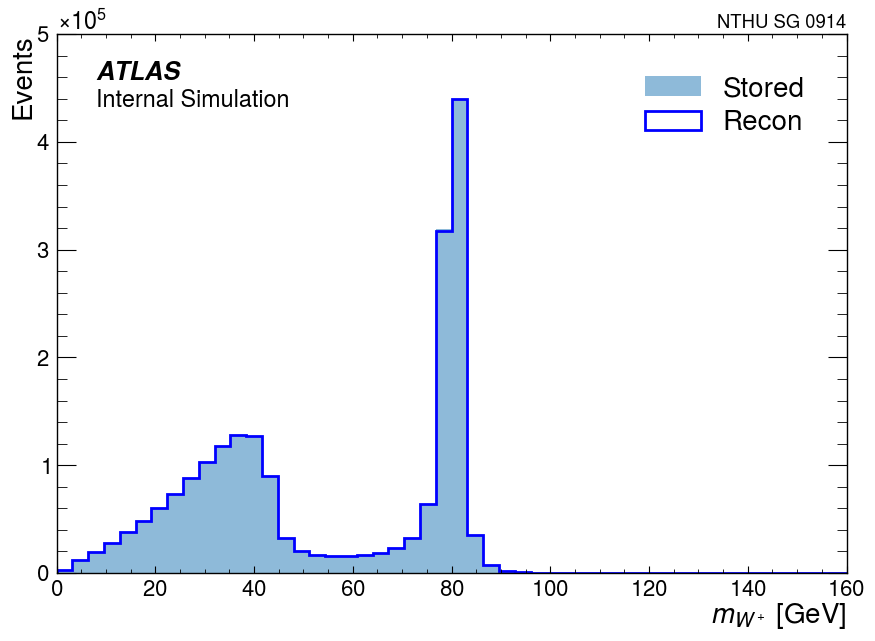

In [ ]:
fig = plt.figure(figsize=(10, 7))
bins_edges = np.linspace(0, 160, 51) # important to fix bins_edges
hep.atlas.label(loc=2, data=True, label="Internal Simulation", rlabel="NTHU SG 0914") # atlas label (optional)
# important to choose the proper unit for x-axis
plt.hist(recon_w_pos_m * 1e-3, bins=bins_edges, histtype="bar", alpha=0.5, color="tab:blue", label=r"Stored")
plt.hist(w_pos_m * 1e-3, bins=bins_edges, histtype="step", linewidth=2, color="blue", label=r"Recon")
plt.legend(loc="best", fontsize=20)
plt.xlabel("$m_{W^+}$ [GeV]", fontsize=20, labelpad=0) # remember to include unit
plt.ylabel("Events", fontsize=20, labelpad=0) 
plt.tick_params(axis="both", which="major", labelsize=16, pad=5)
# plt.yscale("log")
# plt.ylim(1, 2.5e5)
plt.savefig("lepton_pt.pdf", bbox_inches="tight") # save in vector format (e.g., pdf), trim out extra white space
plt.show()

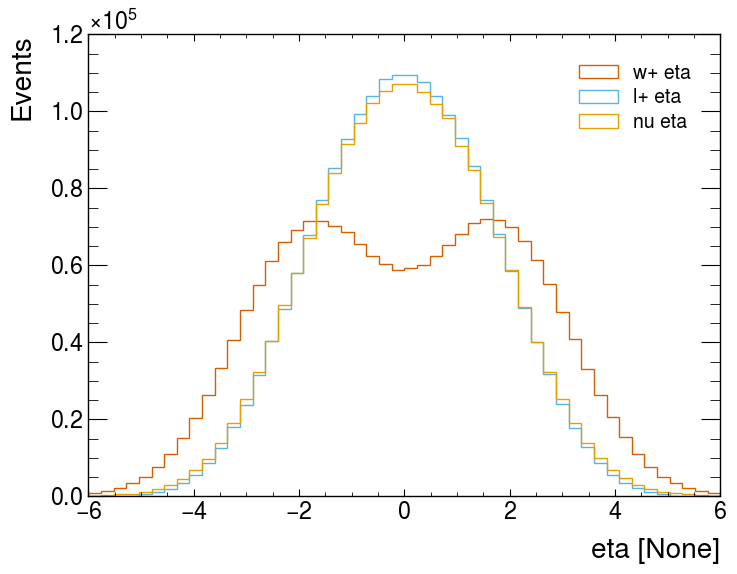

In [ ]:
w_pos_eta = branches["w_pos_eta"].array()

plt.hist(w_pos_eta, bins=np.linspace(-6, 6, 51), histtype="step", label="w+ eta")
plt.hist(lep_pos_eta, bins=np.linspace(-6, 6, 51), histtype="step", label="l+ eta")
plt.hist(nu_eta, bins=np.linspace(-6, 6, 51), histtype="step", label="nu eta")
plt.xlabel("eta [None]")
plt.ylabel("Events")
plt.legend()
plt.show()